In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset1=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv')
print(dataset1)
print(dataset1.columns)
print(dataset1.shape)

     Conductivity  timestamps  Water_Level  Dissolved_Oxygen   Ph  \
0           304.0  2024-06-13        43.53               2.3  7.4   
1           309.0  2024-06-15        43.08               2.2  7.6   
2           308.0  2024-06-16        42.87               2.2  7.6   
3           308.0  2024-06-17        42.68               2.2  7.6   
4           308.0  2024-06-18        42.54               2.2  7.6   
..            ...         ...          ...               ...  ...   
352         298.0  2025-06-08        40.77               2.1  7.8   
353         299.0  2025-06-09        40.78               2.1  7.8   
354         298.0  2025-06-10        40.81               2.1  7.8   
355         298.0  2025-06-11        40.81               2.1  7.8   
356         298.0  2025-06-12        40.84               2.1  7.8   

     Temperature        dk  
0           21.3       0.0  
1           21.3    2880.0  
2           21.3    4320.0  
3           21.3    5760.0  
4           21.3    7200.0

In [4]:
temperature=dataset1.iloc[:,[1,5]]
print(temperature)

     timestamps  Temperature
0    2024-06-13         21.3
1    2024-06-15         21.3
2    2024-06-16         21.3
3    2024-06-17         21.3
4    2024-06-18         21.3
..          ...          ...
352  2025-06-08         21.4
353  2025-06-09         21.4
354  2025-06-10         21.4
355  2025-06-11         21.4
356  2025-06-12         21.4

[357 rows x 2 columns]


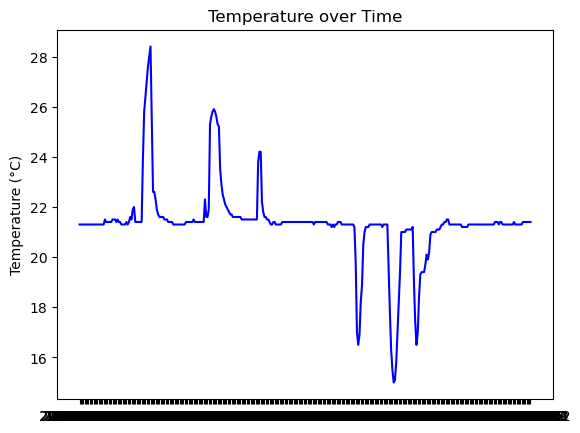

In [5]:
plt.plot(temperature['timestamps'], temperature['Temperature'], color='blue', label='Temperature')
#plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
#plt.xticks(rotation=95)
plt.show()

In [6]:
print(temperature.describe())
print(temperature.info())
temperature.isnull().sum()

       Temperature
count   357.000000
mean     21.355742
std       1.514426
min      15.000000
25%      21.300000
50%      21.300000
75%      21.400000
max      28.400000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamps   357 non-null    object 
 1   Temperature  357 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB
None


timestamps     0
Temperature    0
dtype: int64

## ADF Test (Augmented Dickey-Fuller)
Null Hypothesis (H₀): The series has a unit root → non-stationary

p-value < 0.05 → Reject H₀ → ✅ Stationary

p-value ≥ 0.05 → Fail to reject H₀ → ❌ Non-stationary

✔ So for ADF:

⛳ Small p-value (< 0.05) = Stationary (Good)

🚩 Large p-value (≥ 0.05) = Non-stationary

In [7]:
from statsmodels.tsa.stattools import adfuller
##for temperature, we will investigate the p-value and ADF statistic to be sure it is stationary, otherwise we will need to make it stationary by using differencing.
adf_testing=adfuller(temperature['Temperature'].values)
print('ADF Statistic:', adf_testing[0])
print('p-value:', adf_testing[1])

ADF Statistic: -5.850579640020695
p-value: 3.597313447284208e-07


## KPSS
According to KPSS(Kwiatkowski–Phillips–Schmidt–Shin)test, null hypothesis can not be rejected if p values bigger than 0.05. therefore, it is a non-stationary time series. Null hypothesis for this test says it is stationary. Alternative hypothesis says it is non-stationary.

Null Hypothesis (H₀): The series is stationary

p-value < 0.05 → Reject H₀ → ❌ Non-stationary

p-value ≥ 0.05 → Fail to reject H₀ → ✅ Stationary

✔ So for KPSS:

🚩 Small p-value (< 0.05) = Non-stationary

⛳ Large p-value (≥ 0.05) = Stationary

In [8]:
from statsmodels.tsa.stattools import kpss
testing_kpss = kpss(temperature['Temperature'].values)
print('KPSS Statistic:', testing_kpss[0])
print('p-value:', testing_kpss[1])

KPSS Statistic: 0.7879779770116957
p-value: 0.01


/var/folders/df/732p83n92875l2sf7gcrgzq00000gn/T/ipykernel_2153/336272647.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  testing_kpss = kpss(temperature['Temperature'].values)


## ADF says that the data is stationay however, KPSS proved the otherwise. So, the number 4 of the rules needed to be applied. 

## For ADF & KPSS
Case 1: Both tests conclude that the series is not stationary - The series is not stationary

Case 2: Both tests conclude that the series is stationary - The series is stationary

Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.
https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

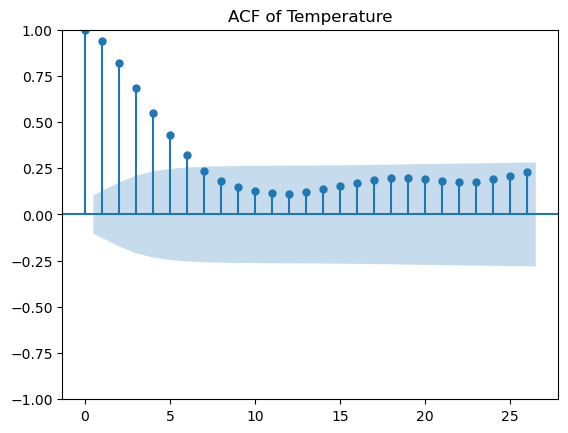

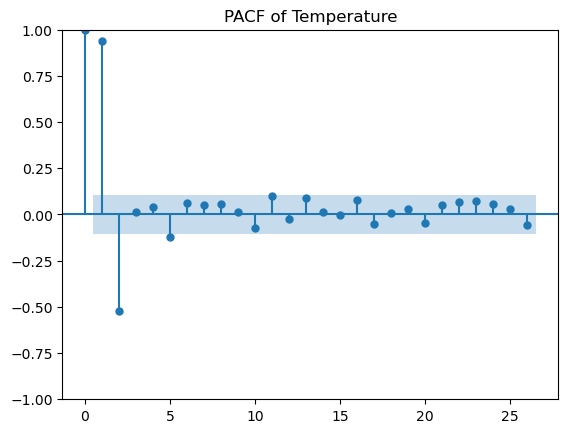

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(temperature['Temperature'])
plt.title('ACF of Temperature')
plt.show()  
plot_pacf(temperature['Temperature'])
plt.title('PACF of Temperature')
plt.show()

In [10]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [11]:
sarimax_model=auto_arima(temperature['Temperature'],seasonal=True,m=7)
print(sarimax_model.summary())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  357
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 7)   Log Likelihood                -216.684
Date:                            Sun, 06 Jul 2025   AIC                            443.367
Time:                                    17:21:37   BIC                            462.742
Sample:                                         0   HQIC                           451.074
                                            - 357                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4012      0.027     51.604      0.000       1.348       1.454
ar.L2         -0.5106      0.025   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [12]:
test_days=71
train = temperature[:-test_days]
test=temperature[-test_days:]
print(train)

     timestamps  Temperature
0    2024-06-13         21.3
1    2024-06-15         21.3
2    2024-06-16         21.3
3    2024-06-17         21.3
4    2024-06-18         21.3
..          ...          ...
281  2025-03-28         21.0
282  2025-03-29         21.1
283  2025-03-30         21.1
284  2025-03-31         21.1
285  2025-04-01         21.2

[286 rows x 2 columns]


In [13]:
model = SARIMAX(train['Temperature'], order=(2,1,1), seasonal_order=(1, 0, [], 7), m=7)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.75674D-01    |proj g|=  5.35353D-01

At iterate    5    f=  7.53070D-01    |proj g|=  1.18176D-02

At iterate   10    f=  7.51590D-01    |proj g|=  6.00637D-02

At iterate   15    f=  7.35995D-01    |proj g|=  1.54178D-01

At iterate   20    f=  7.20821D-01    |proj g|=  8.31524D-02

At iterate   25    f=  7.14285D-01    |proj g|=  1.19893D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['m']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


In [14]:
# Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 10 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
#print(future_dates)
#print(last_obs_date)
# Forecast 10 steps from the last observed date
forecast = results.forecast(steps=30)
#print(forecast)
# Construct forecast series
forecast_series = pd.Series(forecast, index=future_dates)

In [15]:
# Print or plot
print(forecast_series.values)
print(forecast_series.index)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
DatetimeIndex(['2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
               '2025-06-29', '2025-06-30', '2025-07-01', '2025-07-02',
               '2025-07-03', '2025-07-04', '2025-07-05', '2025-07-06',
               '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10',
               '2025-07-11', '2025-07-12'],
              dtype='datetime64[ns]', freq='D')


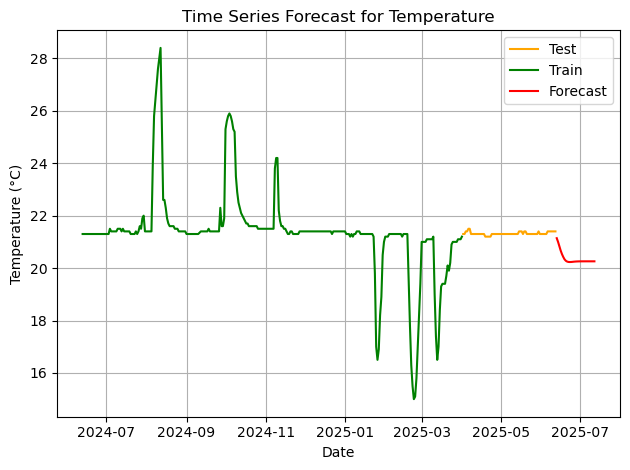

In [17]:
# Ensure timestamps are datetime
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

plt.title('Time Series Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.plot(test_dates, test['Temperature'], label='Test', color='orange')
plt.plot(train_dates, train['Temperature'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARIMA

In [18]:
test_days=71
train = temperature[:-test_days]
test=temperature[-test_days:]
print(train)

     timestamps  Temperature
0    2024-06-13         21.3
1    2024-06-15         21.3
2    2024-06-16         21.3
3    2024-06-17         21.3
4    2024-06-18         21.3
..          ...          ...
281  2025-03-28         21.0
282  2025-03-29         21.1
283  2025-03-30         21.1
284  2025-03-31         21.1
285  2025-04-01         21.2

[286 rows x 2 columns]


In [19]:
model_arima = auto_arima(train['Temperature'], order=(1, 0, 2), m=7)
results_arima = model_arima  # model_arima is already fitted

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

In [20]:
#Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 10 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
#print(future_dates)
#print(last_obs_date)
# Forecast 30 steps from the last observed date using predict
forecast = results_arima.predict(n_periods=30)
#print(forecast)
# Construct forecast series
forecast_series_arima = pd.Series(forecast, index=future_dates)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


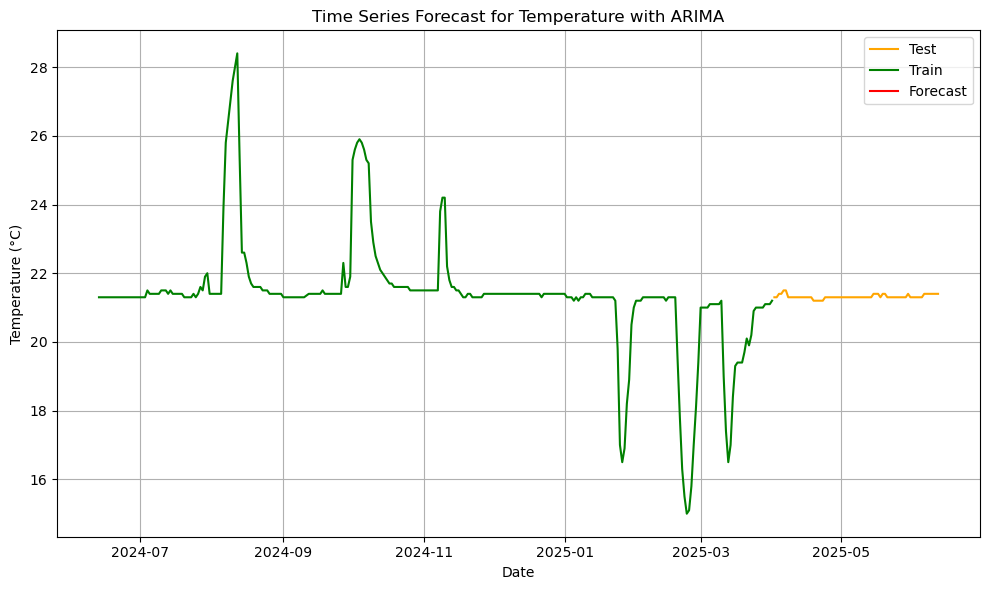

In [31]:
# Ensure timestamps are datetime
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

plt.figure(figsize=(10, 6))
plt.title('Time Series Forecast for Temperature with ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.plot(test_dates, test['Temperature'], label='Test', color='orange')
plt.plot(train_dates, train['Temperature'], label='Train', color='green')
plt.plot(future_dates, forecast_series_arima, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
print(test_dates)
print(future_dates)

286   2025-04-02
287   2025-04-03
288   2025-04-04
289   2025-04-05
290   2025-04-06
         ...    
352   2025-06-08
353   2025-06-09
354   2025-06-10
355   2025-06-11
356   2025-06-12
Name: timestamps, Length: 71, dtype: datetime64[ns]
DatetimeIndex(['2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26', '2025-06-27', '2025-06-28',
               '2025-06-29', '2025-06-30', '2025-07-01', '2025-07-02',
               '2025-07-03', '2025-07-04', '2025-07-05', '2025-07-06',
               '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10',
               '2025-07-11', '2025-07-12'],
              dtype='datetime64[ns]', freq='D')


## AR

In [23]:
test_days=71
train = temperature[:-test_days]
test=temperature[-test_days:]
print(train)

     timestamps  Temperature
0    2024-06-13         21.3
1    2024-06-15         21.3
2    2024-06-16         21.3
3    2024-06-17         21.3
4    2024-06-18         21.3
..          ...          ...
281  2025-03-28         21.0
282  2025-03-29         21.1
283  2025-03-30         21.1
284  2025-03-31         21.1
285  2025-04-01         21.2

[286 rows x 2 columns]


In [24]:
from statsmodels.tsa.ar_model import AutoReg

model_arma = AutoReg(train['Temperature'], lags=1)
results_arma = model_arma.fit()

In [25]:
# Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 30 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
# Forecast 30 steps ahead using start and end
start = len(train)
end = start + 29
forecast = results_arma.predict(start=start, end=end)
# Construct forecast series
forecast_series = pd.Series(forecast.values, index=future_dates)

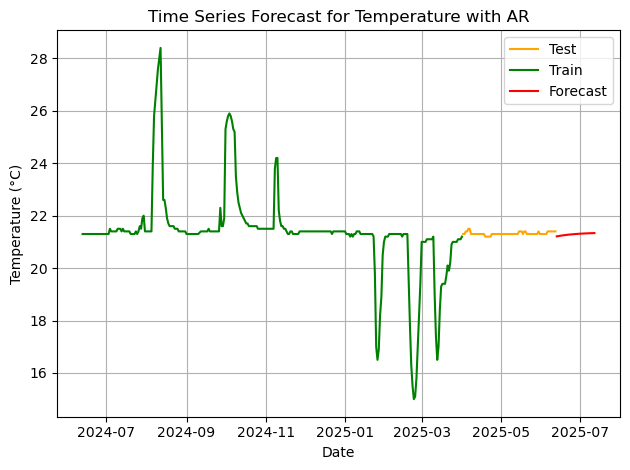

In [26]:
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

plt.title('Time Series Forecast for Temperature with AR')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.plot(test_dates, test['Temperature'], label='Test', color='orange')
plt.plot(train_dates, train['Temperature'], label='Train', color='green')
plt.plot(future_dates, forecast_series, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARMA

In [27]:
import numpy as np
from statsmodels.tsa.arima_process import arma_acf

# AR and MA params must start with 1 (for lag 0)
ar = np.r_[1, -results_arima.arparams()]
ma = np.r_[1, results_arima.maparams()]

# Plot ARMA prediction with train and test dataset
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

acf_values = arma_acf(ar=ar, ma=ma, lags=30)
print(acf_values)

[ 1.          0.43478568  0.06215356 -0.16809747 -0.13923408 -0.11532671
 -0.09552438 -0.07912224 -0.06553645 -0.05428343 -0.04496262 -0.03724226
 -0.03084753 -0.02555081 -0.02116357 -0.01752966 -0.0145197  -0.01202658
 -0.00996154 -0.00825108 -0.00683432 -0.00566082 -0.00468882 -0.00388372
 -0.00321686 -0.00266451 -0.00220699 -0.00182804 -0.00151415 -0.00125416]


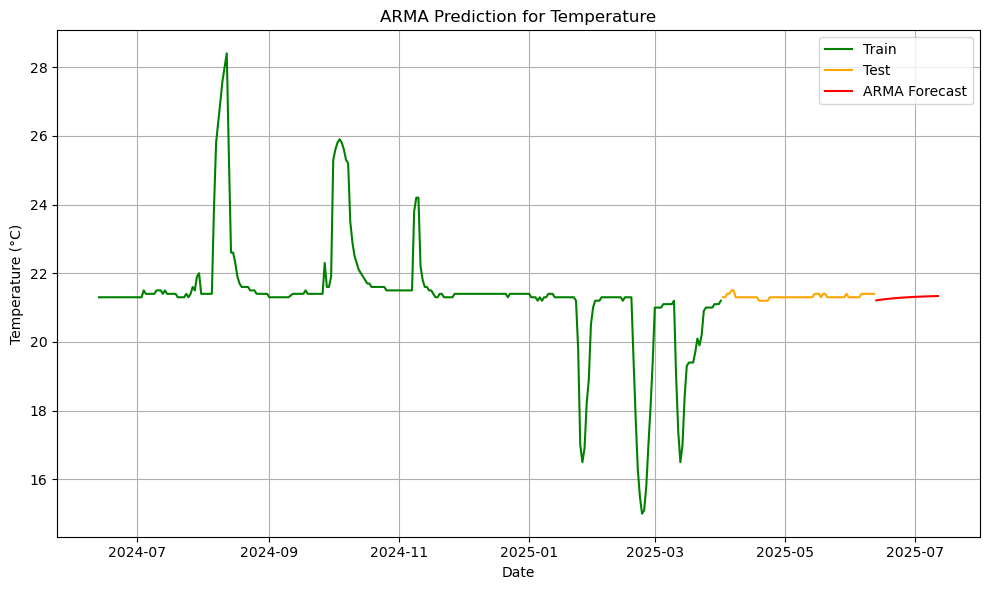

In [35]:
plt.figure(figsize=(10, 6))
plt.title('ARMA Prediction for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.plot(train_dates, train['Temperature'], label='Train', color='green')
plt.plot(test_dates, test['Temperature'], label='Test', color='orange')
plt.plot(future_dates, forecast_series, label='ARMA Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## MA

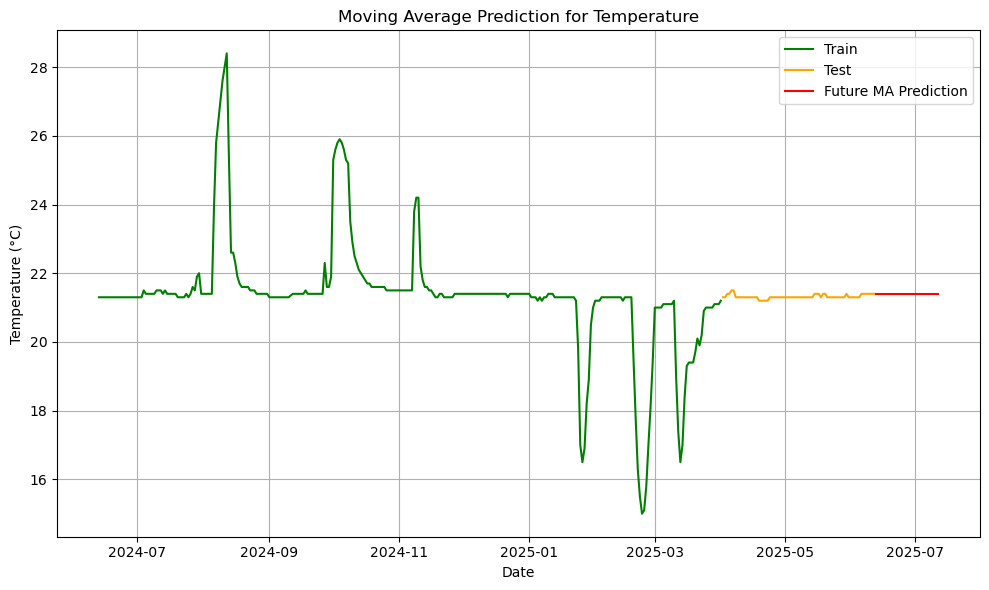

In [38]:
# Apply moving average (rolling mean) on train data
window_size = 5 # 7-day moving average
moving_avg = train['Temperature'].rolling(window=window_size, min_periods=1).mean()

# For prediction, extend moving average to test and future dates
# Concatenate train and test for rolling prediction
full_data = pd.concat([train, test])
full_moving_avg = full_data['Temperature'].rolling(window=window_size, min_periods=1).mean()

# For future prediction, use the last moving average value as a naive forecast
future_pred = pd.Series([full_moving_avg.iloc[-1]] * len(future_dates), index=future_dates)

# Prepare dates for plotting
full_dates = pd.to_datetime(full_data['timestamps'])

plt.figure(figsize=(10, 6))
plt.title('Moving Average Prediction for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.plot(train_dates, train['Temperature'], label='Train', color='green')
plt.plot(test_dates, test['Temperature'], label='Test', color='orange')
#plt.plot(full_dates, full_moving_avg, label='Moving Average', color='blue')
plt.plot(future_dates, future_pred, label='Future MA Prediction', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()